In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt          
%matplotlib inline                       
from sklearn import preprocessing   

In [2]:
mercari_train=pd.read_csv("D:/analytics/Hackathon/Mercari/train1.csv",encoding = "ISO-8859-1")

In [3]:
mercari_train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home DÃ©cor/Home DÃ©cor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
mercari_train.cov()

,train_id,item_condition_id,price,shipping
train_id,9.162588e+10,-6.875381,8170.206747,274.027323
item_condition_id,-6.875381e+00,0.815544,-0.040478,-0.085773
price,8.170207e+03,-0.040478,1488.674861,-1.863180
shipping,2.740273e+02,-0.085773,-1.863180,0.247234


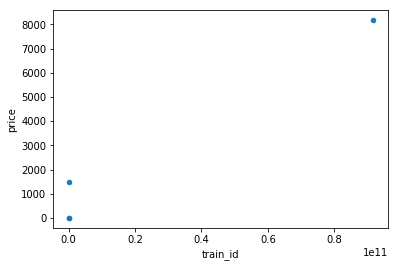

In [5]:
mercari_train.cov().plot(kind='scatter',x='train_id', y='price')

In [6]:
mercari_train.describe()

,train_id,item_condition_id,price,shipping
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,1.907426e+00,2.673616e+01,4.474091e-01
std,3.026977e+05,9.030750e-01,3.858335e+01,4.972267e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,5.242870e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,7.864305e+05,3.000000e+00,2.900000e+01,1.000000e+00
max,1.048574e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [ ]:
mercari_train['Cat1'], mercari_train['Cat2'], mercari_train['Cat3'] = mercari_train['category_name'].apply(lambda x: pd.Series(str(x).split('/')))

In [8]:
mercari_trainnum=mercari_train.select_dtypes(include=[np.number]) # strategy 1 split the data frame into numeric and character data frame and values
mercari_traincat=mercari_train.select_dtypes(include=[object])

In [9]:
mercari_trainnum.head()

,train_id,item_condition_id,price,shipping
0,0,3,10.0,1
1,1,3,52.0,0
2,2,1,10.0,1
3,3,1,35.0,1
4,4,1,44.0,0


In [10]:
mercari_trainnum.describe()

,train_id,item_condition_id,price,shipping
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,1.907426e+00,2.673616e+01,4.474091e-01
std,3.026977e+05,9.030750e-01,3.858335e+01,4.972267e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,5.242870e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,7.864305e+05,3.000000e+00,2.900000e+01,1.000000e+00
max,1.048574e+06,5.000000e+00,2.009000e+03,1.000000e+00


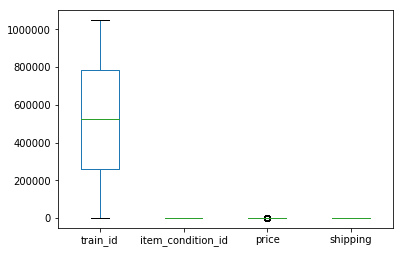

In [12]:
mercari_trainnum.plot(kind='box')

In [13]:
(mercari_trainnum.isnull().sum()).sort_values(ascending=False)  ## to find out number of missing values(NA) columns

shipping             0
price                0
item_condition_id    0
train_id             0
dtype: int64

In [14]:
mercari_traincat.head()

,name,category_name,brand_name,item_description
0,MLB Cincinnati Reds T Shirt Size XL,Men/Tops/T-shirts,NaN,No description yet
1,Razer BlackWidow Chroma Keyboard,Electronics/Computers & Tablets/Components & P...,Razer,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,Women/Tops & Blouses/Blouse,Target,Adorable top with a hint of lace and a key hol...
3,Leather Horse Statues,Home/Home DÃ©cor/Home DÃ©cor Accents,NaN,New with tags. Leather horses. Retail for [rm]...
4,24K GOLD plated rose,Women/Jewelry/Necklaces,NaN,Complete with certificate of authenticity


In [40]:
(mercari_traincat.isnull().sum()).sort_values(ascending=False)  ## to find out number of missing values(NA) columns

brand_name          447335
category_name         4503
item_description         2
name                     0
dtype: int64

In [19]:
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline#histogram


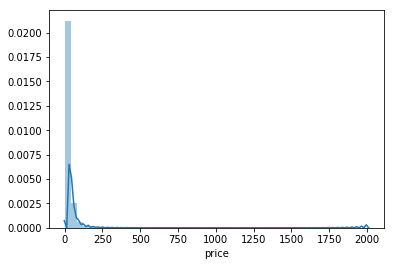

In [22]:
sns.distplot(mercari_train['price']);

In [23]:
mercari_traincat['category_name'].value_counts

<bound method IndexOpsMixin.value_counts of 0                                          Men/Tops/T-shirts
1          Electronics/Computers & Tablets/Components & P...
2                                Women/Tops & Blouses/Blouse
3                       Home/Home DÃ©cor/Home DÃ©cor Accents
4                                    Women/Jewelry/Necklaces
5                                          Women/Other/Other
6                                   Women/Swimwear/Two-Piece
7                            Sports & Outdoors/Apparel/Girls
8                            Sports & Outdoors/Apparel/Girls
9                   Vintage & Collectibles/Collectibles/Doll
10                                        Beauty/Makeup/Face
11                                    Beauty/Fragrance/Women
12                            Women/Dresses/Above Knee, Mini
13                     Other/Office supplies/School Supplies
14                                         Women/Shoes/Boots
15                                 Beauty

In [ ]:
mercari_traincat['category_name'].apply(lambda x: pd.Series(str(x).split('/')))